In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=500, precision=1)

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display dataset info
print(x_train.shape)
print(y_train.shape)

# Display sample data
print(x_train[0, :, :])
print(y_train[0])

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0

In [3]:
x_train = (x_train - 127.5) / 127.5 # normalize value to [-1, 1]
print(x_train[0, :, :])

[[-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -0.9 -0.9 -0.9 -0.   0.1  0.4 -0.8  0.3  1.   0.9 -0.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -0.8 -0.7 -0.3  0.2  0.3  1.   1.   1.   1.   1.   0.8  0.3  1.   0.9  0.5 -0.5 -1.  -1.  -1.  -1. ]

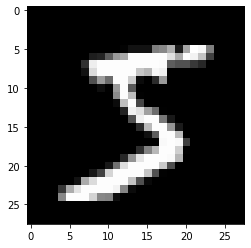

In [4]:
# Show an example
plt.imshow(x_train[0, :, :], cmap='gray')

In [5]:
BUFFER_SIZE = x_train.shape[0]
BATCH_SIZE = 256
LATENT_DIM = 100

dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [6]:
# Define the discriminator
D = tf.keras.Sequential()
D.add(layers.Flatten(input_shape=(28, 28)))
D.add(layers.Dense(512))
D.add(layers.LeakyReLU(alpha=0.2))
D.add(layers.Dense(256))
D.add(layers.LeakyReLU(alpha=0.2))
D.add(layers.Dense(1, activation='sigmoid'))

# Display the discriminator
D.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
__________________________________________________

In [7]:
# Define the generator

G = tf.keras.Sequential()
G.add(layers.Dense(256, input_dim=LATENT_DIM))
G.add(layers.LeakyReLU(alpha=0.2))
G.add(layers.BatchNormalization(momentum=0.8))
G.add(layers.Dense(512, input_dim=LATENT_DIM))
G.add(layers.LeakyReLU(alpha=0.2))
G.add(layers.BatchNormalization(momentum=0.8))
G.add(layers.Dense(1024, input_dim=LATENT_DIM))
G.add(layers.LeakyReLU(alpha=0.2))
G.add(layers.BatchNormalization(momentum=0.8))
G.add(layers.Dense(28*28, activation='tanh'))
G.add(layers.Reshape((28, 28)))

G.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 1024)             

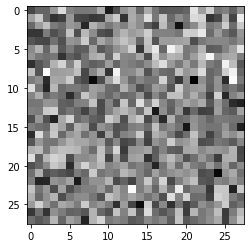

In [8]:
z = tf.random.normal([1, LATENT_DIM])
fake_img = G(z, training=False)
plt.imshow(fake_img[0, :, :], cmap='gray')

In [9]:
# Define losses
cross_entropy = tf.keras.losses.BinaryCrossentropy()
binary_accuracy = tf.keras.metrics.BinaryAccuracy()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(0.9*tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    real_acc = binary_accuracy(tf.ones_like(real_output), real_output)
    fake_acc = binary_accuracy(tf.ones_like(fake_output), fake_output)
    return (real_loss + fake_loss), (real_acc + fake_acc)/2

def generator_loss(fake_output):
    fake_loss = cross_entropy(0.9*tf.ones_like(fake_output), fake_output)
    return fake_loss


In [10]:
# Define optimizers
G_optimizer = tf.keras.optimizers.Adam(1e-4)
D_optimizer = tf.keras.optimizers.Adam(1e-4)

In [11]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    with tf.GradientTape() as G_tape, tf.GradientTape() as D_tape:
        generated_imgs = G(noise, training=True)

        real_output = D(images, training=True)
        fake_output = D(generated_imgs, training=True)

        G_loss = generator_loss(fake_output)
        D_loss, D_acc = discriminator_loss(real_output, fake_output)
    G_gradients = G_tape.gradient(G_loss, G.trainable_variables)
    D_gradients = D_tape.gradient(D_loss, D.trainable_variables)
    G_optimizer.apply_gradients(zip(G_gradients, G.trainable_variables))
    D_optimizer.apply_gradients(zip(D_gradients, D.trainable_variables))
    return G_loss, D_loss, D_acc
    

In [12]:
EPOCHS = 1000

real = np.ones((BATCH_SIZE, 1))
fake = np.zeros((BATCH_SIZE, 1))

for epoch in range(EPOCHS):
    d_loss = g_loss = d_acc = 0.0
    n = 0
    for batch in dataset:
        dl, gl, da = train_step(batch)
        d_loss += dl
        d_acc += da
        g_loss += gl
        n += 1
    print("\rEpoch %d: d_loss %f, d_acc %f, g_loss %f" % (epoch+1, d_loss/n, d_acc/n, g_loss/n), end="")

Epoch 1000: d_loss 1.575446, d_acc 0.416588, g_loss 0.949732

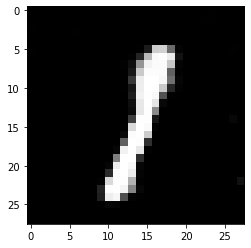

In [13]:
fake_img = G(z, training=False)
plt.imshow(fake_img[0, :, :], cmap='gray')

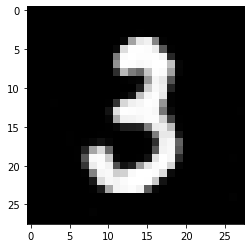

In [16]:
z = tf.random.normal([1, LATENT_DIM])
fake_img = G(z, training=False)
plt.imshow(fake_img[0, :, :], cmap='gray')

In [15]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

Tue Jun  8 06:47:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    44W / 250W |    475MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------